In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("mpg.csv")

In [3]:
data = data[data.horsepower != "?"]

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [5]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.model_selection import train_test_split
df=data
training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
target = 'mpg'

X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.10, random_state=169)

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=22)

#n_estimators here mean weak learners that will be clubbed into one strong model
# but instead of using the normal approach the resultant storng model will be arrived at
# by gradient updatation at each iteration.

In [9]:
model.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=22)

In [10]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

#we should get a better rsquare value than adaboost

Mean squared error: 2.57
R Square score: 0.95


In [11]:
#to see the weights of the weak learners(models)
model.estimator_weights_

array([1.58957417, 1.27866052, 1.53365634, 0.62086024, 0.75371405,
       0.57710671, 1.10522627, 1.11618029, 0.74546962, 0.97310982,
       0.75646055, 0.46110106, 0.63366458, 0.76627044, 0.80871597,
       0.98527962, 0.39759408, 0.54234432, 0.8876775 , 0.4128086 ,
       0.52733661, 0.22494974])

[Text(167.4, 190.26, 'X[2] <= 120.5\nmse = 74.358\nsamples = 352\nvalue = 25.17'),
 Text(83.7, 135.9, 'X[3] <= 77.5\nmse = 41.385\nsamples = 141\nvalue = 32.605'),
 Text(41.85, 81.53999999999999, 'X[4] <= 85.0\nmse = 18.845\nsamples = 57\nvalue = 27.667'),
 Text(20.925, 27.180000000000007, 'mse = 10.422\nsamples = 38\nvalue = 29.658'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 11.9\nsamples = 19\nvalue = 23.684'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 21.1\nmse = 28.903\nsamples = 84\nvalue = 35.956'),
 Text(104.625, 27.180000000000007, 'mse = 22.236\nsamples = 72\nvalue = 34.678'),
 Text(146.475, 27.180000000000007, 'mse = 0.287\nsamples = 12\nvalue = 43.625'),
 Text(251.10000000000002, 135.9, 'X[4] <= 122.5\nmse = 34.76\nsamples = 211\nvalue = 20.201'),
 Text(209.25, 81.53999999999999, 'X[3] <= 78.5\nmse = 23.025\nsamples = 149\nvalue = 22.846'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 9.747\nsamples = 91\nvalue = 20.371'),
 Text(230.175, 27.18

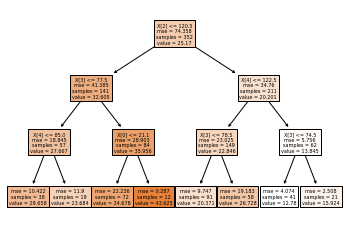

In [14]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[2],filled=True)

#reduce depth to get a clear picture with values
# model.estimators_[i] here i can be 0 to 21 since we have 22 estimators